In [1]:
## Import
import pandas as pd
import random
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [3]:
## Data Load
train = pd.read_csv('./자료/안테나 성능 예측 자료/train.csv')
test = pd.read_csv('./자료/안테나 성능 예측 자료/test.csv')
submit = pd.read_csv('./자료/안테나 성능 예측 자료/sample_submission.csv')

In [6]:
train.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TRAIN_00001,70.544,103.320,67.47,1,101.892,74.983,29.45,62.38,245.71,...,29.632,16.083,4.276,-25.381,-25.529,-22.769,23.792,-25.470,-25.409,-25.304
1,TRAIN_00002,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,...,33.179,16.736,3.229,-26.619,-26.523,-22.574,24.691,-26.253,-26.497,-26.438
2,TRAIN_00003,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,...,31.801,17.080,2.839,-26.238,-26.216,-22.169,24.649,-26.285,-26.215,-26.370
3,TRAIN_00004,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,...,34.503,17.143,3.144,-25.426,-25.079,-21.765,24.913,-25.254,-25.021,-25.345
4,TRAIN_00005,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,...,32.602,17.569,3.138,-25.376,-25.242,-21.072,25.299,-25.072,-25.195,-24.974


In [7]:
test.head()

,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,TEST_00001,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,TEST_00002,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,TEST_00003,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,TEST_00004,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,TEST_00005,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [8]:
submit.head()

,ID,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
0,TEST_00001,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,TEST_00002,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,TEST_00003,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TEST_00004,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,TEST_00005,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
x_feature_info = pd.read_csv('./자료/안테나 성능 예측 자료/meta/x_feature_info.csv')
x_feature_info

,Feature,설명
0,X_01,PCB 체결 시 단계별 누름량(Step 1)
1,X_02,PCB 체결 시 단계별 누름량(Step 2)
2,X_03,방열 재료 1 무게
3,X_04,1차 검사 통과 여부
4,X_05,PCB 체결 시 단계별 누름량(Step 3)
5,X_06,PCB 체결 시 단계별 누름량(Step 4)
6,X_07,방열 재료 1 면적
7,X_08,방열 재료 2 면적
8,X_09,방열 재료 3 면적
9,X_10,방열 재료 2 무게


In [11]:
y_feature_info = pd.read_csv('./자료/안테나 성능 예측 자료/meta/y_feature_info.csv')
y_feature_info

,Feature,설명
0,Y_01,안테나 Gain 평균 (각도1)
1,Y_02,안테나 1 Gain 편차
2,Y_03,안테나 2 Gain 편차
3,Y_04,평균 신호대 잡음비
4,Y_05,안테나 Gain 평균 (각도2)
5,Y_06,신호대 잡음비 (각도1)
6,Y_07,안테나 Gain 평균 (각도3)
7,Y_08,신호대 잡음비 (각도2)
8,Y_09,신호대 잡음비 (각도3)
9,Y_10,신호대 잡음비 (각도4)


In [13]:
y_feature_spec_info = pd.read_csv('./자료/안테나 성능 예측 자료/meta/y_feature_spec_info.csv')
y_feature_spec_info

,Feature,최소,최대
0,Y_01,0.2,2.0
1,Y_02,0.2,2.1
2,Y_03,0.2,2.1
3,Y_04,7.0,19.0
4,Y_05,22.0,36.5
5,Y_06,-19.2,19.0
6,Y_07,2.4,4.0
7,Y_08,-29.2,-24.0
8,Y_09,-29.2,-24.0
9,Y_10,-30.6,-20.0


In [14]:
train_x = train.filter(regex = 'X')
train_y = train.filter(regex = 'Y')

In [15]:
# test_x
test = pd.read_csv('./자료/안테나 성능 예측 자료/test.csv').drop(columns = ['ID'])
test.head()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
0,68.504,103.321,76.67,1,101.867,73.963,30.51,63.57,239.80,0.0,...,1,1,17227.63,138.130429,129.460682,141.506570,133.427229,129.711498,133.138096,121.859684
1,67.485,103.320,69.37,1,101.992,67.845,28.03,116.99,189.23,0.0,...,1,1,17134.53,136.148839,128.266277,145.911745,131.196417,132.411480,133.629025,124.178623
2,69.524,103.320,68.97,1,101.884,77.022,29.65,205.68,214.93,0.0,...,1,1,14860.83,120.447446,119.988804,132.099908,120.450155,130.051708,128.252972,114.475628
3,69.524,103.320,65.87,1,101.866,73.963,28.15,103.38,180.80,0.0,...,1,1,15252.53,133.994695,125.069180,147.507669,123.142653,125.963665,139.666592,126.589253
4,73.603,103.321,66.67,1,101.891,74.983,29.92,71.20,231.93,0.0,...,1,1,10752.23,137.918202,135.116192,138.600473,127.173033,137.252712,134.411335,124.020016


In [17]:
from matplotlib import font_manager, rc

# 글꼴 설정
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
plt.rc('font', family= font_name)

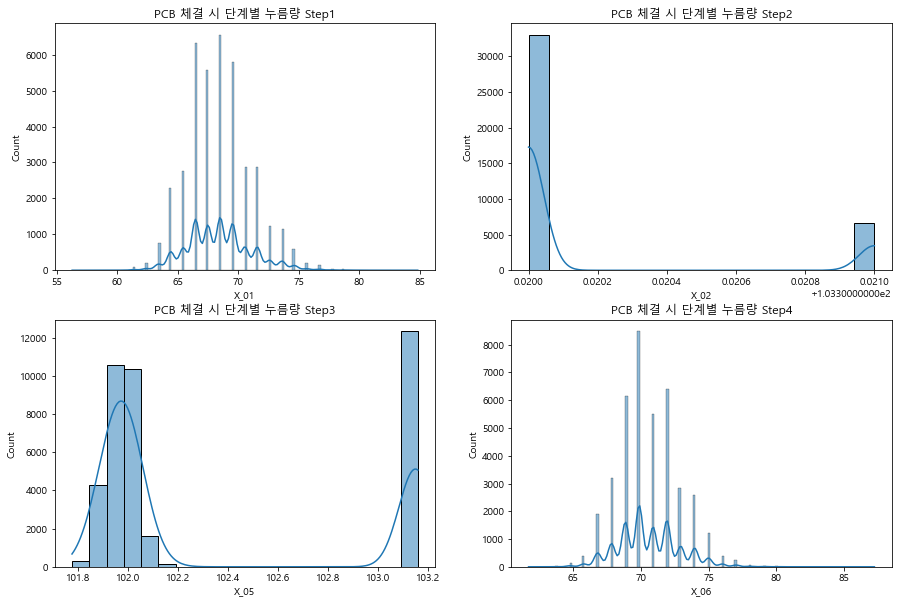

In [19]:
## EDA
pcb = train_x[['X_01', 'X_02', 'X_05', 'X_06']]

# PCB 체결 시 단계별 누름량
fig, axes = plt.subplots(2, 2, figsize = (15, 10))

sns.histplot(data = pcb, x = 'X_01', kde = True, ax = axes[0, 0]).set(title = "PCB 체결 시 단계별 누름량 Step1")
sns.histplot(data = pcb, x = 'X_02', kde = True, ax = axes[0, 1]).set(title = "PCB 체결 시 단계별 누름량 Step2")
sns.histplot(data = pcb, x = 'X_05', kde = True, ax = axes[1, 0]).set(title = "PCB 체결 시 단계별 누름량 Step3")
sns.histplot(data = pcb, x = 'X_06', kde = True, ax = axes[1, 1]).set(title = "PCB 체결 시 단계별 누름량 Step4")

plt.show()

[Text(0.5, 1.0, 'Heating material')]

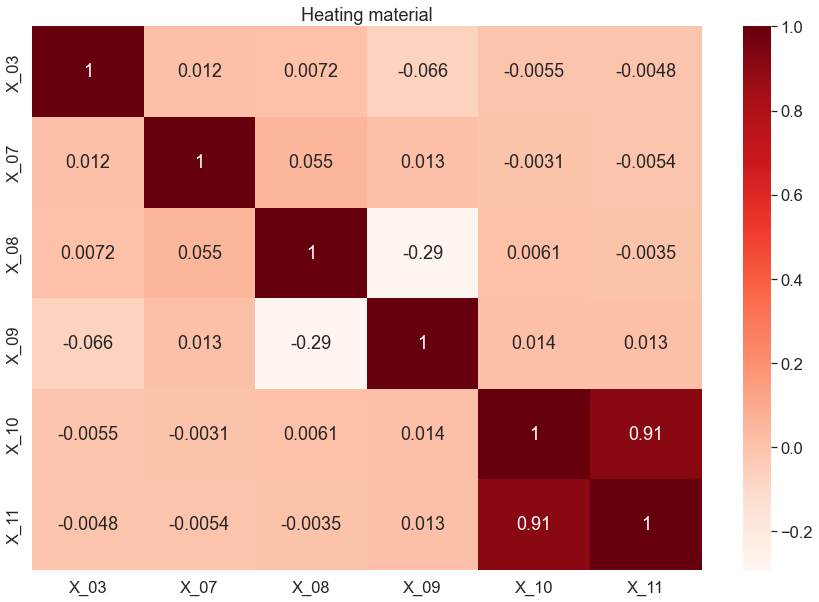

In [20]:
# 방열 재료 1 면적 및 무게
heat = train_x[['X_03', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11']]

plt.figure(figsize = (15, 10))

sns.set(font_scale = 1.5)

ax = plt.axes()
sns.heatmap(heat.corr(), annot = True, cmap = 'Reds', ax = ax).set(title = "Heating material")